**Istalling libraries**

In [291]:
pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**Importing libraries**

In [292]:
import pandas as pd
import numpy as np
from sklearn import svm 

#Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import randint

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
Classifier_Random_Forest = "RandomForest"
Classifier_KNN_Classifier = "KNN-Classifier"
Classifier_Logistic_Regression = "Logistic-Regression"
Classifier_Decision_Tree = "Decision-Tree"
Classifier_NB = "Naive-Bayes"
Classifier_SVM = "SVM"

**Import CSV file in python and display data**

In [294]:
data = pd.read_csv('Data/data.csv', sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Display taregt values and count**

In [295]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

**Divide the data into input and outputs**

In [296]:
inputs = data.drop(['Target'], axis = 1)
target = data['Target']

**Split the data into training and testing data**

In [297]:
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 365,
                                                   stratify = target)

**Encoding target labels**

In [298]:
enc_t = LabelEncoder()
y_train = enc_t.fit_transform(y_train)
y_test = enc_t.transform(y_test)
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1137, 1: 635, 2: 1767}

In [299]:
integer_mapping = {l: i for i, l in enumerate(enc_t.classes_)}
integer_mapping

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

In [300]:

SelectedClassifier = input("Select your classifier: KNN-Classifier, RandomForest, Logistic-Regression, Decision-Tree, Naive Bayes, and SVM")
print(SelectedClassifier)

SVM


**Using the test data to predict the labels. This will be used to find the performance of the model**

In [301]:
def run_classifier(x_train, x_test, y_train, y_test, SelectedClassifier):
    if SelectedClassifier == Classifier_KNN_Classifier:
        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
    elif SelectedClassifier == Classifier_Random_Forest:
        rf = RandomForestClassifier(random_state=365, ccp_alpha=0.001)
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
    elif SelectedClassifier == Classifier_Logistic_Regression:
        logistic_regression = LogisticRegression(random_state = 365)
        logistic_regression.fit(x_train, y_train)
        y_pred= logistic_regression.predict(x_test)
    elif SelectedClassifier == Classifier_Decision_Tree:
        dtree = DecisionTreeClassifier(random_state = 365)
        dtree.fit(x_train, y_train)
        y_pred= dtree.predict(x_test)
    elif SelectedClassifier == Classifier_NB:
        nb_classifier = MultinomialNB()
        from sklearn.preprocessing import MinMaxScaler #fixed import
        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)
        nb_classifier.fit(x_train, y_train)
        y_pred = nb_classifier.predict(x_test)
    elif SelectedClassifier == Classifier_SVM:
        svm_classifier = svm.SVC(kernel='linear', C=1)  # You can choose a kernel and set the regularization parameter (C)
        svm_classifier.fit(x_train, y_train)
        y_pred = svm_classifier.predict(x_test)
    
    else:
        print("No Classifier Selected")
        return None

    precision = precision_score(y_test, y_pred, average="micro")
    recall = recall_score(y_test, y_pred, average="micro")
    f1 = f1_score(y_test, y_pred, average="micro")

    # Calculate micro-average
    micro_precision = precision
    micro_recall = recall
    micro_f1 = f1

    print("Micro-average Precision: {:.2f}".format(micro_precision))
    print("Micro-average Recall: {:.2f}".format(micro_recall))
    print("Micro-average F1-Score: {:.2f}".format(micro_f1))
    print("======================================")
    print("=======CLASSIFICATION SUMMARY=========")
    print(classification_report(y_test, y_pred))

**Applicaiton of a Synthetic Minority Oversampling Technique(SMOTE)**

In [302]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='auto', k_neighbors=20, n_jobs=4, random_state=365)

x_resampled, y_resampled = sm.fit_resample(x_train, y_train)
unique, counts = np.unique(y_resampled, return_counts=True)

classificationReport = run_classifier(x_resampled, x_test, y_resampled, y_test,SelectedClassifier=SelectedClassifier)
print(classificationReport)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Micro-average Precision: 0.75
Micro-average Recall: 0.75
Micro-average F1-Score: 0.75
=======CLASSIFICATION SUMMARY=========
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       284
           1       0.48      0.57      0.52       159
           2       0.84      0.81      0.83       442

    accuracy                           0.75       885
   macro avg       0.71      0.72      0.71       885
weighted avg       0.77      0.75      0.76       885

None


**Hyperparameter Tuning**

In [306]:
def run_hyperparameters(x_train, y_train):
    ####### KNN
    if SelectedClassifier == Classifier_KNN_Classifier:
        param_dist_knn = {
            'n_neighbors': randint(36,37),  # Number of neighbors to consider
            'p': [1, 2],  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
            'weights': ['uniform', 'distance']  # Weighting strategy
        }
        # Create a KNN classifier
        knn = KNeighborsClassifier()
        # Use random search to find the best hyperparameters
        rand_search = RandomizedSearchCV(knn,
                                            param_distributions=param_dist_knn,
                                            n_iter=5,
                                            cv=5)
        # Fit the random search object to the data
        rand_search.fit(x_train, y_train)
    ######## RANDOM FOREST
    elif SelectedClassifier == Classifier_Random_Forest:
        param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20)}
        # Create a random forest classifier
        rf = RandomForestClassifier()
        # # Use random search to find the best hyperparameters
        rand_search = RandomizedSearchCV(rf,
                                        param_distributions = param_dist,
                                        n_iter=5,
                                        cv=5)
        # Fit the random search object to the data
        rand_search.fit(x_train, y_train)
    ###LOGISTIC REGRESSION
    elif SelectedClassifier ==Classifier_Logistic_Regression:
        param_dist_lr = {
        'C': [0.1, 0.5, 1.0, 2.0],  # Regularization parameter
        'penalty': ['l1', 'l2'],  # Regularization type
        }
        # Create a Logistic Regression classifier
        lr = LogisticRegression()
        # Use random search to find the best hyperparameters
        rand_search = RandomizedSearchCV(lr,
                                            param_distributions=param_dist_lr,
                                            n_iter=5,
                                            cv=5)
        # Fit the random search object to the data
        rand_search.fit(x_train, y_train)
    elif SelectedClassifier ==Classifier_Decision_Tree:
        dt_classifier = DecisionTreeClassifier()
        param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
        }
        # Create a Logistic Regression classifier
        rand_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
        # Fit the model to find the best hyperparameters
        rand_search.fit(x_train, y_train)
    elif SelectedClassifier ==Classifier_NB:
      
        naive_bayes = MultinomialNB()
        from sklearn.preprocessing import MinMaxScaler #fixed import
        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)

# Define the range of alpha values to test
        param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Choose your scoring metric (e.g., accuracy)
        scoring = 'accuracy'

# Perform grid search with cross-validation
        grid_search = GridSearchCV(naive_bayes, param_grid, scoring=scoring, cv=5)
        grid_search.fit(x_train, y_train)

# Get the best hyperparameters
        best_alpha = grid_search.best_params_['alpha']

        # Train the final model with the best hyperparameters
        rand_search = MultinomialNB(alpha=best_alpha)
        rand_search.fit(x_train, y_train)
   
        ################SVM
    elif SelectedClassifier ==Classifier_SVM:
        from sklearn.model_selection import RandomizedSearchCV
        from sklearn.svm import SVC

        # Define the parameter space for SVM
        param_dist_svm = {
            'C': [0.1, 0.5, 1.0, 2.0],  # Regularization parameter
            'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
            'degree': [2, 3, 4],  # Polynomial degree (for 'poly' kernel)
        }

        # Create an SVM classifier
        svm = SVC()

        # Use random search to find the best hyperparameters
        rand_search_svm = RandomizedSearchCV(svm,
                                             param_distributions=param_dist_svm,
                                             n_iter=5,
                                             cv=5)

        # Fit the random search object to the data
        rand_search_svm.fit(x_train, y_train)

    else:
        print("No Classifier Selected")
        return None
    
    return rand_search


In [307]:
rand_search= run_hyperparameters(x_resampled,y_resampled)

**Classification report for different parameters**

In [305]:
# Create a variable for the best model

if SelectedClassifier == Classifier_NB:
    print('Naive Bayes has no hyperparameter tuning')
    
else:
    print('Best parameters set found on development set: ')
    print(rand_search.best_params_)
    print()

    means = rand_search.cv_results_['mean_test_score']
    stds = rand_search.cv_results_['std_test_score']    
    print()


print('Detailed classification report:')
print()
print('The model is trained on the full development set.')
print('The scores are computed on the full evaluation set.')
print()
y_true, y_pred = y_test, rand_search.predict(x_test)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred,average="micro")

# Calculate micro-average
micro_precision = precision.mean()
micro_recall = recall.mean()
micro_f1 = f1.mean()

print("Micro-average Precision: {:.2f}".format(micro_precision))
print("Micro-average Recall: {:.2f}".format(micro_recall))
print("Micro-average F1-Score: {:.2f}".format(micro_f1))
print("======================================")
print("=======CLASSIFICATION SUMMARY=========")
print(classification_report(y_test,y_pred))

Best parameters set found on development set: 


AttributeError: 'NoneType' object has no attribute 'best_params_'

**Finding important features in the dataset and Plot Graph**

/Users/syphonphilter/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


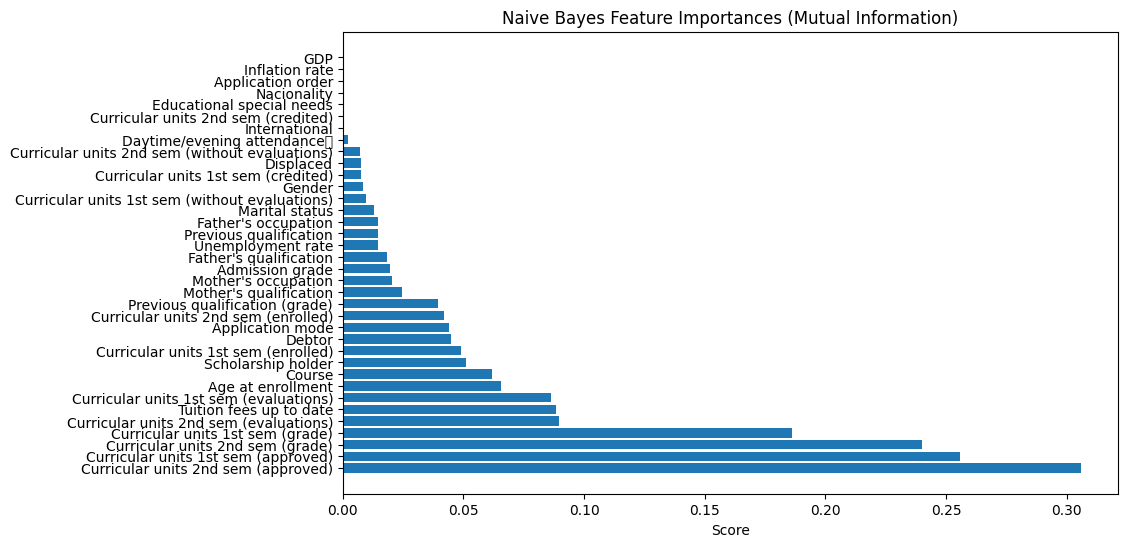

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
/Users/syphonphilter/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


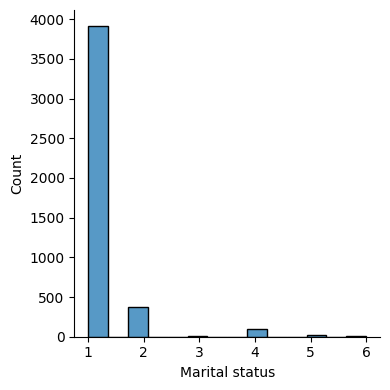

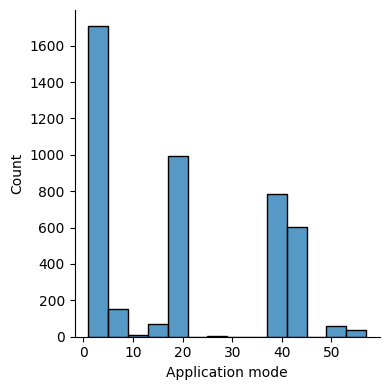

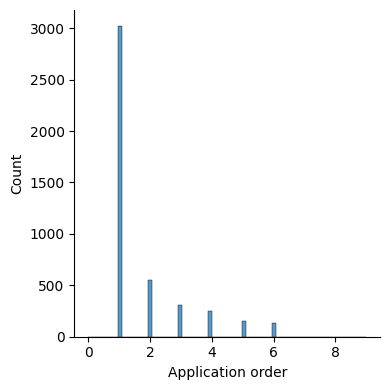

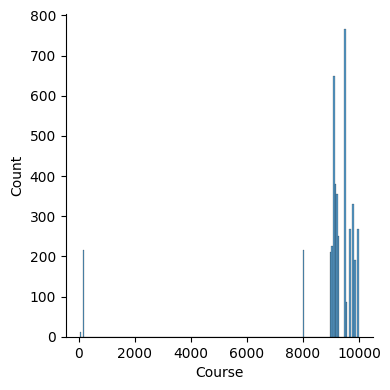

/Users/syphonphilter/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


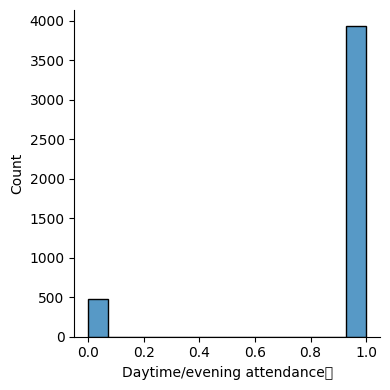

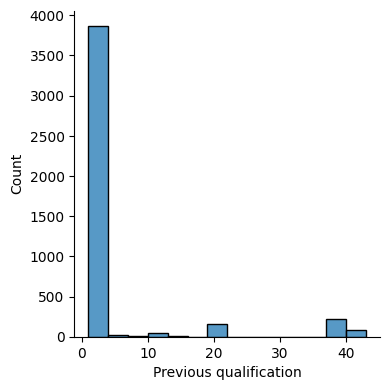

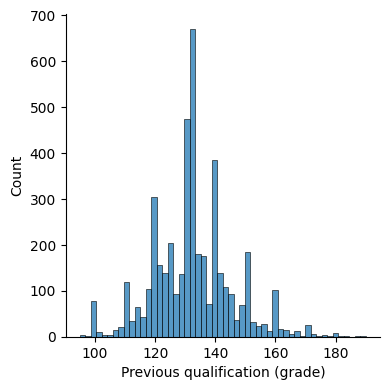

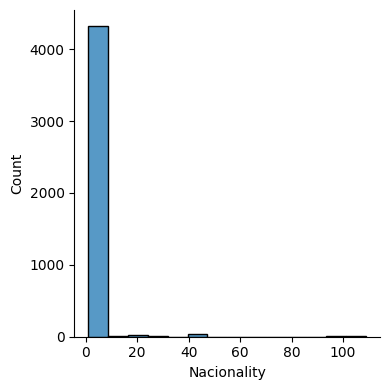

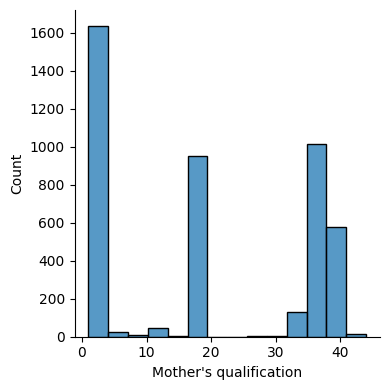

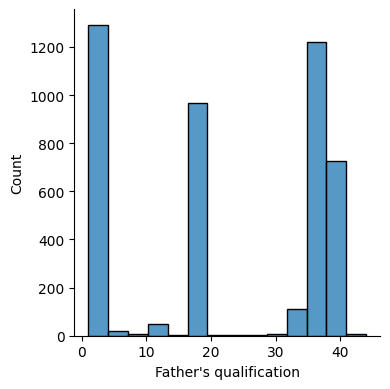

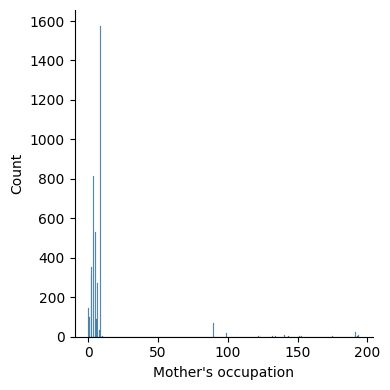

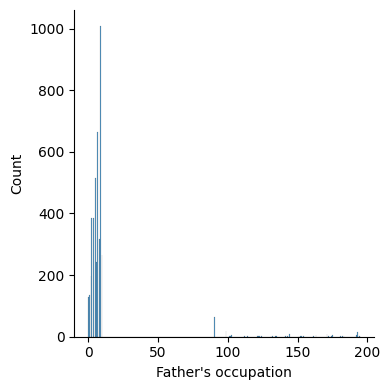

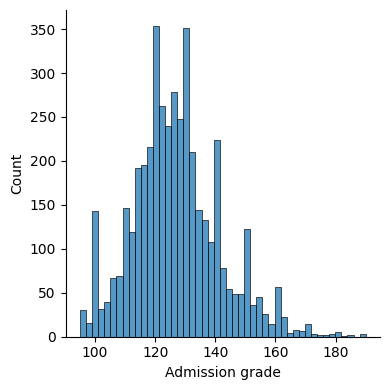

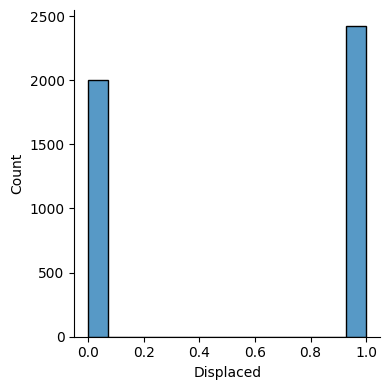

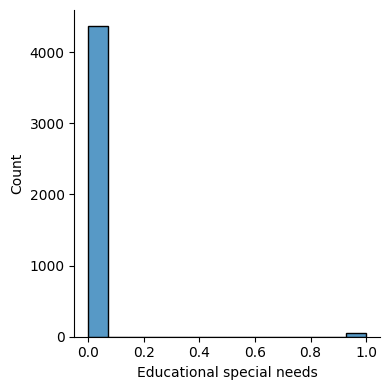

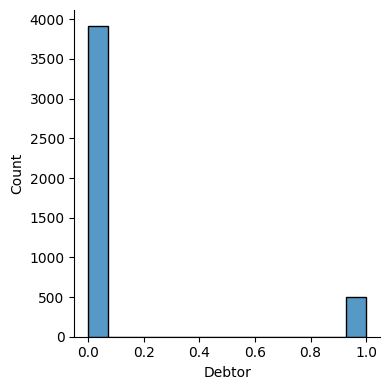

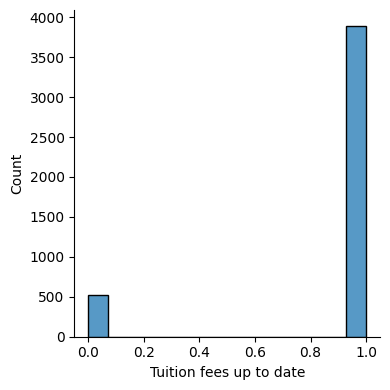

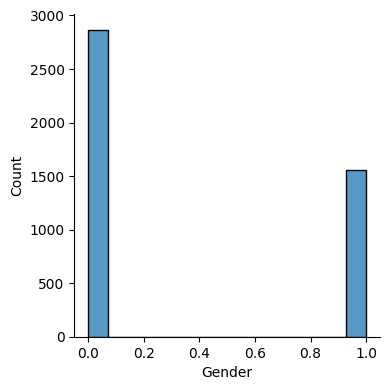

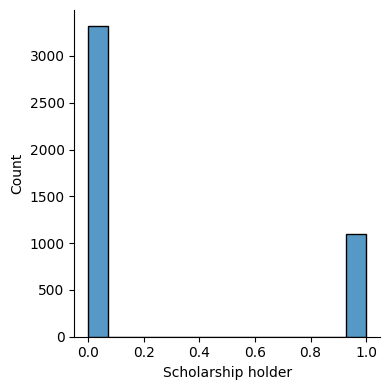

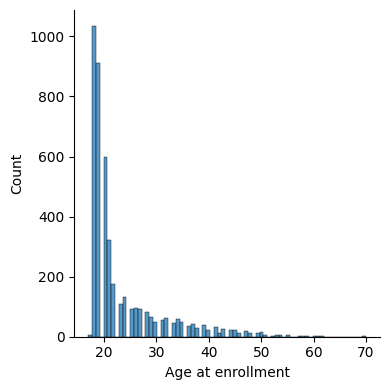

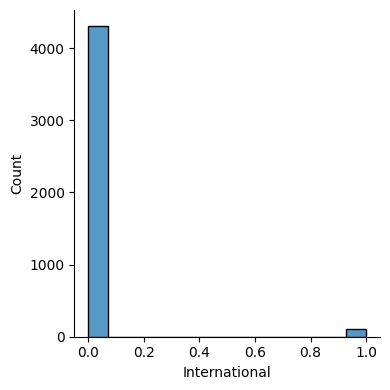

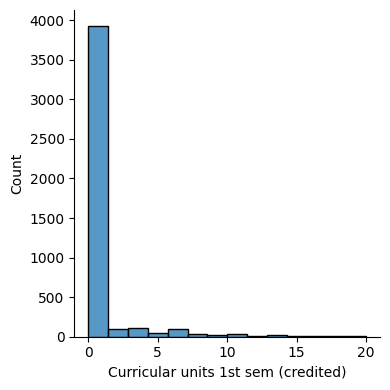

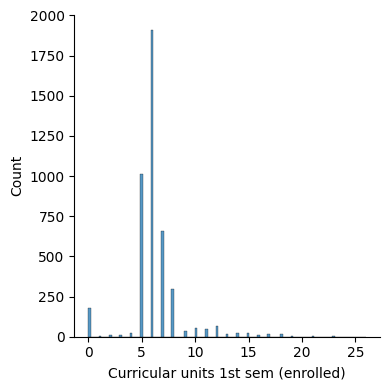

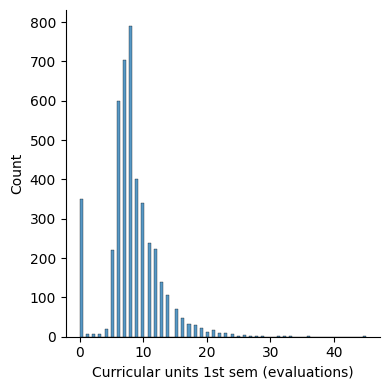

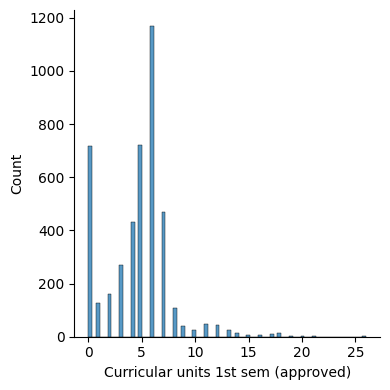

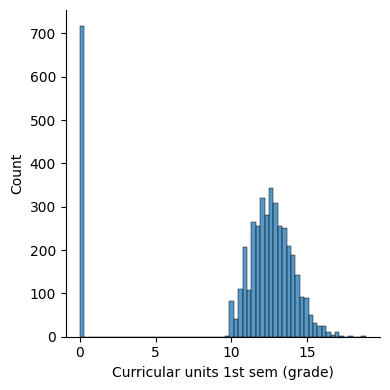

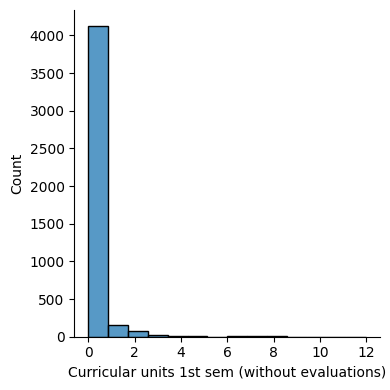

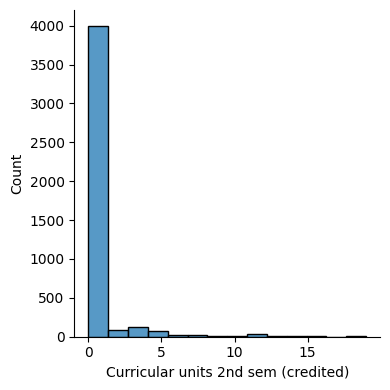

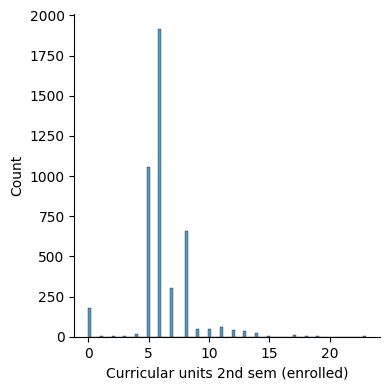

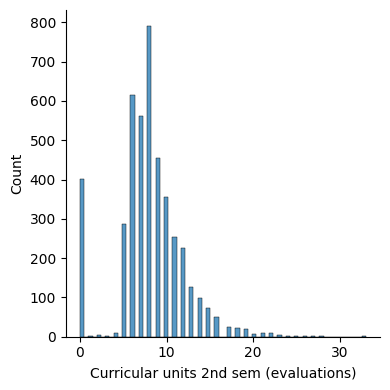

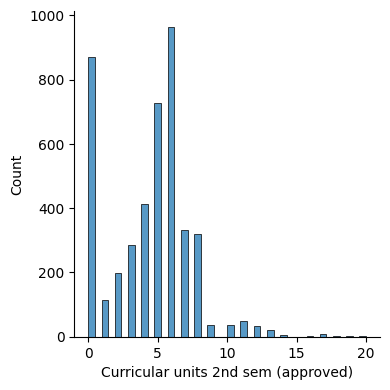

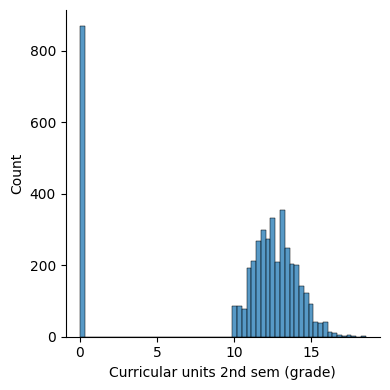

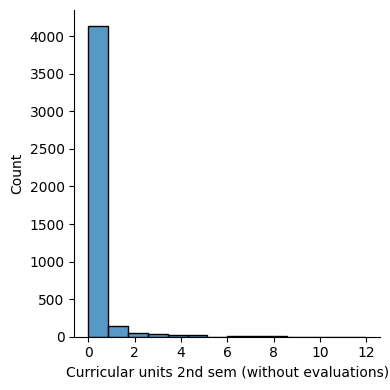

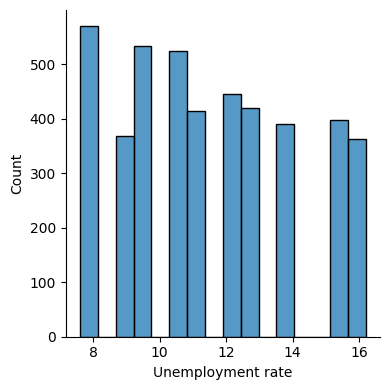

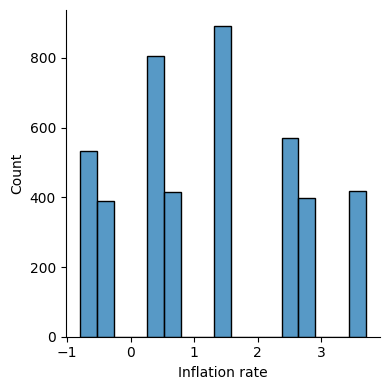

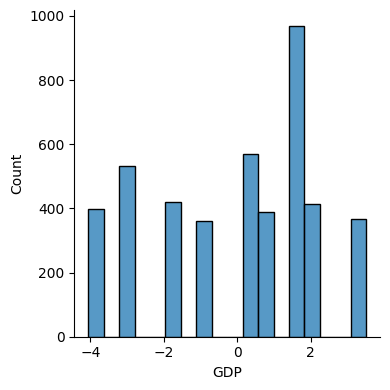

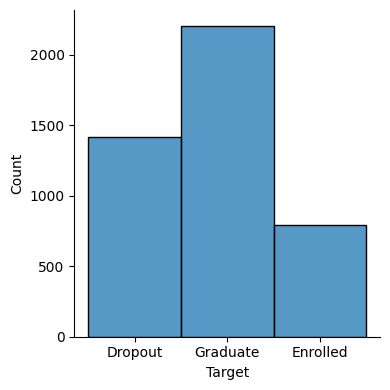

In [ ]:
if SelectedClassifier ==Classifier_KNN_Classifier:
    best_knn = rand_search.best_estimator_
    best_knn.fit(x_train, y_train)
    # Get the distance matrix from each data point to its k-nearest neighbors
    distances, indices = best_knn.kneighbors(x_train)
    # Analyze the feature relevance based on distances to neighbors
    # For example, you can calculate the average distance for each feature
    feature_relevance = distances.mean(axis=0)

    # Create a Series to visualize the feature relevance
    feature_relevance_series = pd.Series(feature_relevance, index=x_train.columns).sort_values(ascending =False)

    # Plot a bar chart for feature relevance
    plt.figure(figsize=(10, 6))
    feature_relevance_series.plot.bar()
    plt.title('Feature Relevance in KNN')
    plt.show()
elif SelectedClassifier == Classifier_Random_Forest:
    #FOR RANDOM SEARCH
    best_rf = rand_search.best_estimator_
    # Create a series containing feature importances from the model and feature names from the training data
    feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
    # Plot a simple bar chart
    plt.figure(figsize=(10,6))
    feature_importances.plot.bar();
elif SelectedClassifier == Classifier_Logistic_Regression:
    best_lr = rand_search.best_estimator_
    feature_coefficients = pd.Series(best_lr.coef_[0], index=x_train.columns).sort_values(ascending=False)
    # Plot a simple bar chart
    plt.figure(figsize=(10, 6))
    feature_coefficients.plot.bar()
    plt.title("Logistic Regression Feature Importances")
    plt.show()

elif SelectedClassifier == Classifier_Decision_Tree:
    best_dt = rand_search.best_estimator_
    feature_importances = pd.Series(best_dt.feature_importances_, index=x_train.columns).sort_values(ascending=False)
    # Plot a simple bar chart
    plt.figure(figsize=(10, 6))
    feature_importances.plot.bar()
    plt.title("Decision Tree Feature Importances")
    plt.show()

elif SelectedClassifier == Classifier_NB:
    from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

    # Assuming you've trained a Naive Bayes classifier and named it 'naive_bayes_classifier'
    # You can replace this with your actual Naive Bayes classifier

    # Create SelectKBest with chi-squared or mutual information
    k_best = SelectKBest(score_func=mutual_info_classif, k='all')

    # Fit and transform the feature selection method on the training data
    x_train_selected = k_best.fit_transform(x_train, y_train)

    # Get the scores of feature importance
    feature_scores = k_best.scores_

    # Create a Pandas DataFrame to associate features with their scores
    feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Score': feature_scores})
    feature_importances = feature_importances.sort_values(by='Score', ascending=False)

    # Plot a bar chart to visualize feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Score'])
    plt.title("Naive Bayes Feature Importances (Mutual Information)")
    plt.xlabel("Score")
    plt.show()
elif SelectedClassifier == Classifier_SVM:
    from sklearn.svm import SVC

    # Assuming you have already performed hyperparameter tuning and obtained the best SVM model
    best_svm = rand_search.best_estimator_

    # Check if the SVM is linear
    if isinstance(best_svm, SVC) and best_svm.kernel == 'linear':
        # Get the coefficients (weights) of the features
        feature_weights = best_svm.coef_[0]

        # Sort the feature weights in ascending order
        feature_weights_sorted = sorted(enumerate(feature_weights), key=lambda x: abs(x[1]), reverse=True)

        # Extract feature names and their corresponding weights
        feature_names = x_train.columns
        top_features = [feature_names[i] for i, _ in feature_weights_sorted]

        # Plot the feature weights
        plt.figure(figsize=(10, 6))
        plt.barh(top_features[:10], [w for _, w in feature_weights_sorted[:10]])
        plt.title("Top 10 Feature Weights (Linear SVM)")
        plt.xlabel("Feature Weight")
        plt.show()
    else:
        print("Feature ranking is only applicable for linear SVMs.")
        
    else:
        print("No Classifier selected")

    for i in data.columns:
    sns.displot(data=data, x=i, height=4)
    